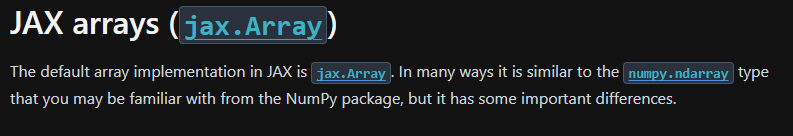

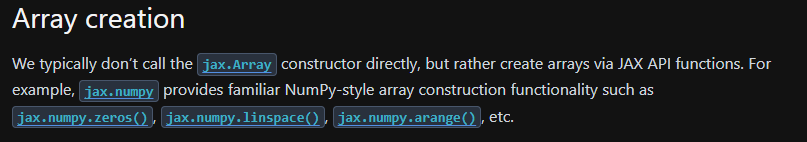

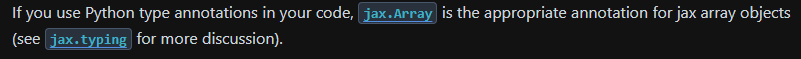

In [2]:
import jax
import jax.numpy as jnp
jax.config.update("jax_platform_name", "cpu")

x = jnp.arange(5)
isinstance(x, jax.Array)

True

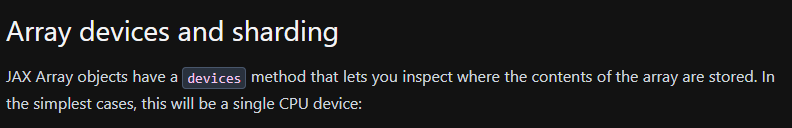

In [3]:
x.devices()

{CpuDevice(id=0)}

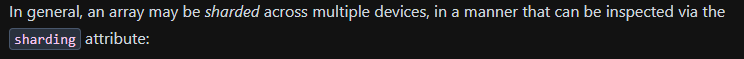

In [4]:
x.sharding

SingleDeviceSharding(device=CpuDevice(id=0))

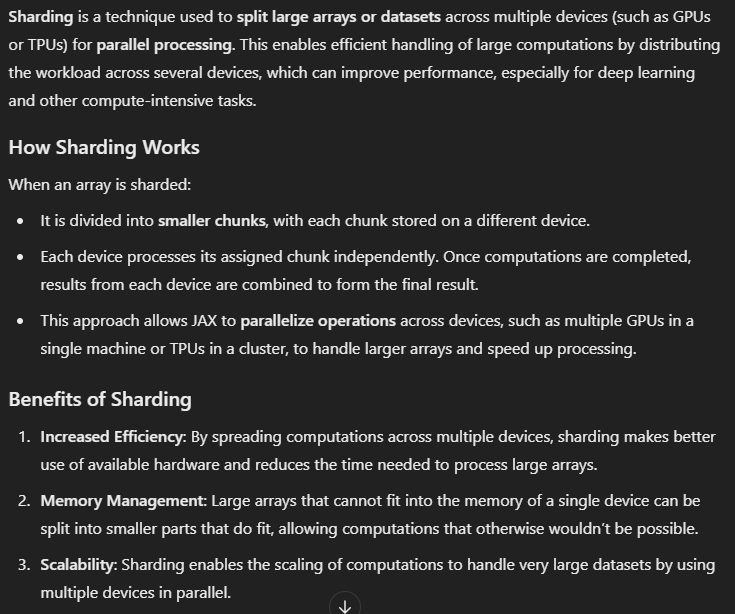

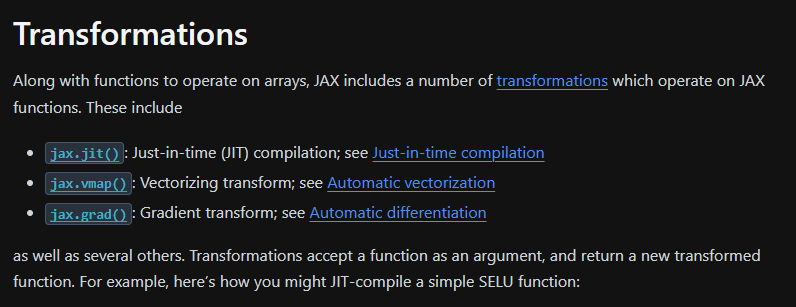

In [5]:
def selu(x, alpha=1.67, lambda_=1.05):
  return lambda_ * jnp.where(x > 0, x, alpha * jnp.exp(x) - alpha)

selu_jit = jax.jit(selu)
print(selu_jit(1.0))

1.05


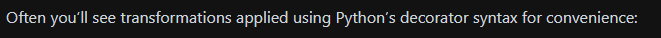

In [6]:
@jax.jit
def selu(x, alpha=1.67, lambda_=1.05):
  return lambda_ * jnp.where(x > 0, x, alpha * jnp.exp(x) - alpha)

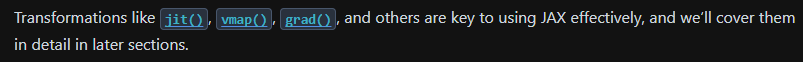

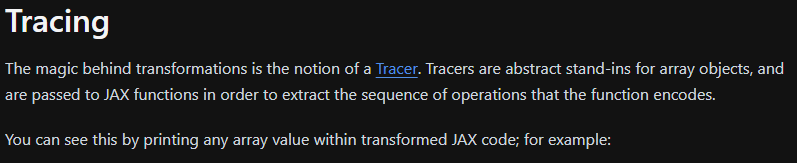

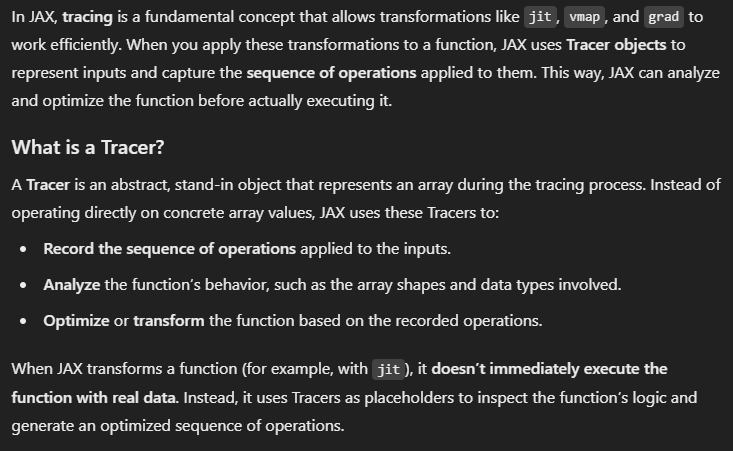

In [7]:
@jax.jit
def f(x):
  print(x)
  return x + 1

x = jnp.arange(5)
result = f(x)

Traced<ShapedArray(int32[5])>with<DynamicJaxprTrace(level=1/0)>


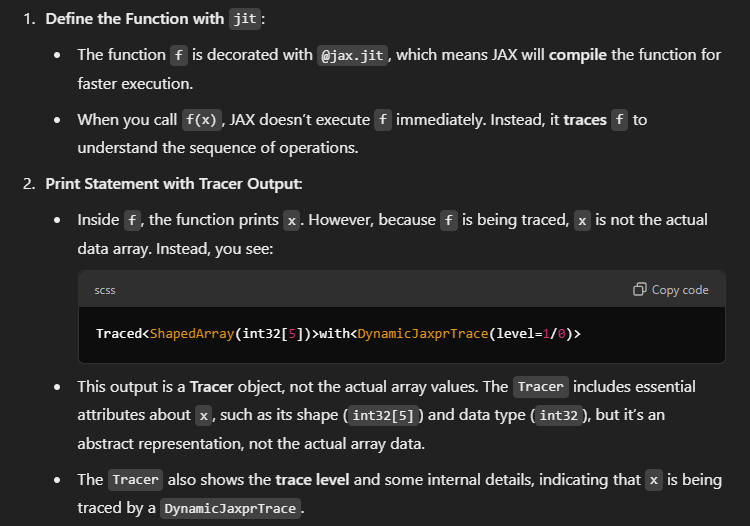

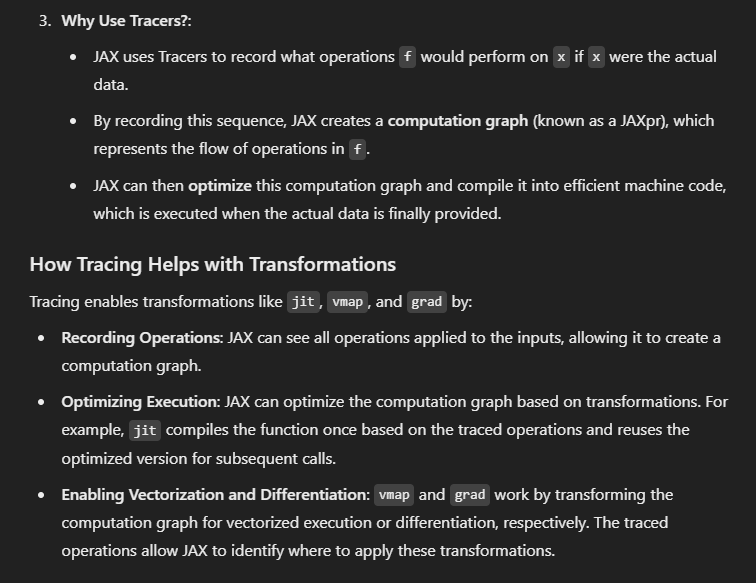

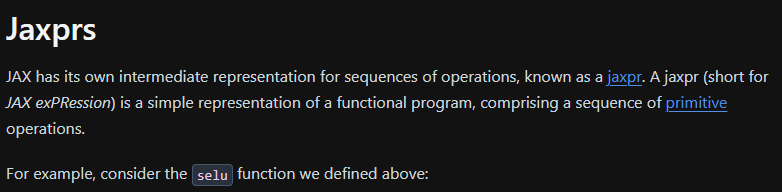

In [8]:
def selu(x, alpha=1.67, lambda_=1.05):
  return lambda_ * jnp.where(x > 0, x, alpha * jnp.exp(x) - alpha)

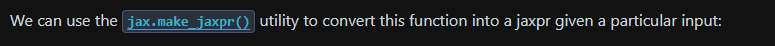

In [9]:
x = jnp.arange(5.0)
jax.make_jaxpr(selu)(x)

{ lambda ; a:f32[5]. let
    b:bool[5] = gt a 0.0
    c:f32[5] = exp a
    d:f32[5] = mul 1.6699999570846558 c
    e:f32[5] = sub d 1.6699999570846558
    f:f32[5] = pjit[
      name=_where
      jaxpr={ lambda ; g:bool[5] h:f32[5] i:f32[5]. let
          j:f32[5] = select_n g i h
        in (j,) }
    ] b a e
    k:f32[5] = mul 1.0499999523162842 f
  in (k,) }

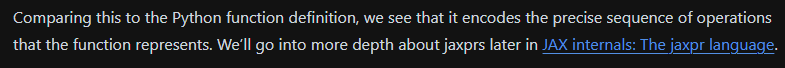

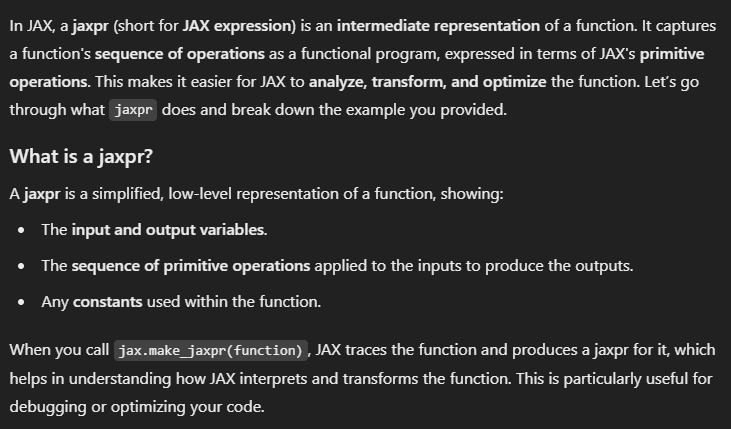

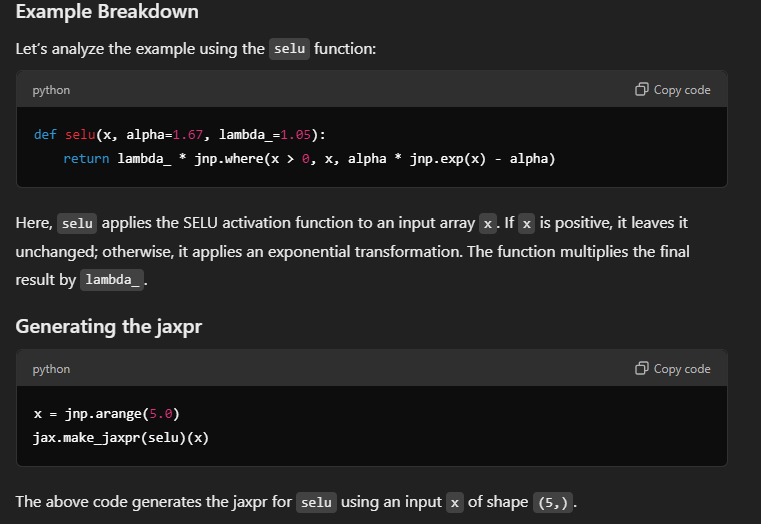

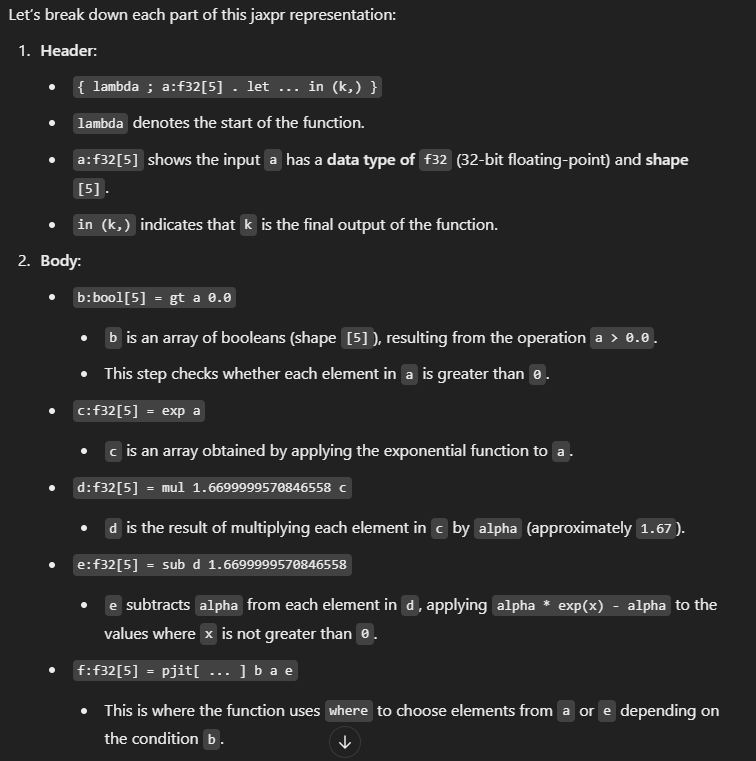

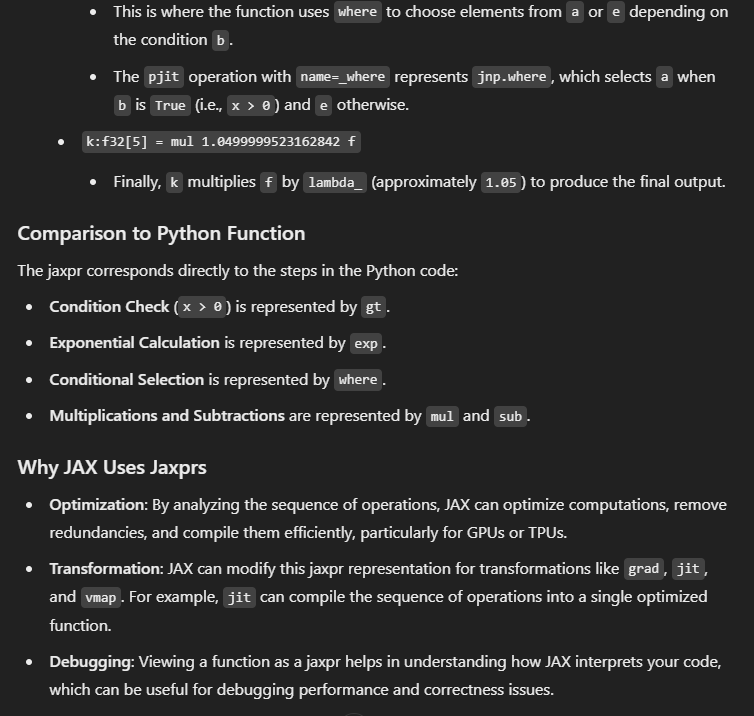

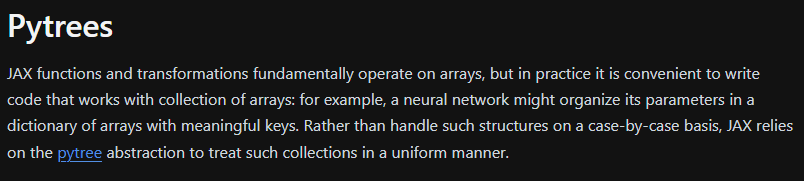

In [10]:
# (nested) list of parameters
params = [1, 2, (jnp.arange(3), jnp.ones(2))]

print(jax.tree.structure(params))
print(jax.tree.leaves(params))

PyTreeDef([*, *, (*, *)])
[1, 2, Array([0, 1, 2], dtype=int32), Array([1., 1.], dtype=float32)]


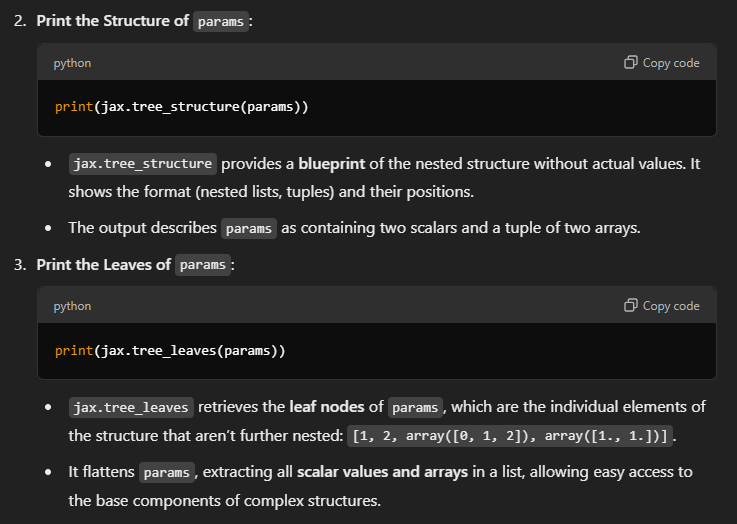

In [11]:
# Dictionary of parameters
params = {'n': 5, 'W': jnp.ones((2, 2)), 'b': jnp.zeros(2)}

print(jax.tree.structure(params))
print(jax.tree.leaves(params))

PyTreeDef({'W': *, 'b': *, 'n': *})
[Array([[1., 1.],
       [1., 1.]], dtype=float32), Array([0., 0.], dtype=float32), 5]


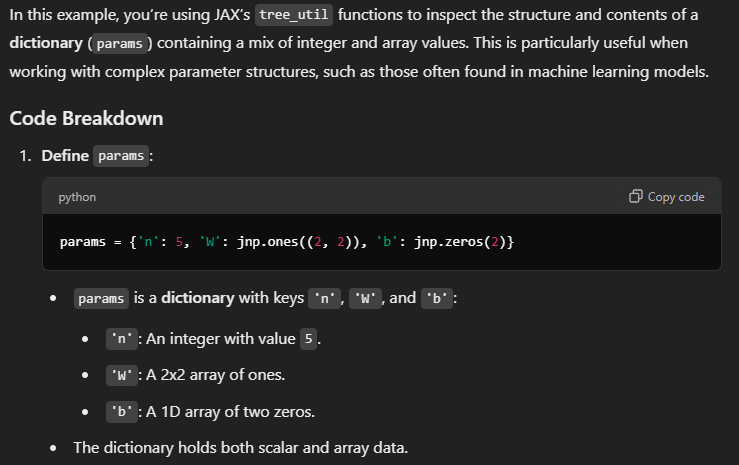
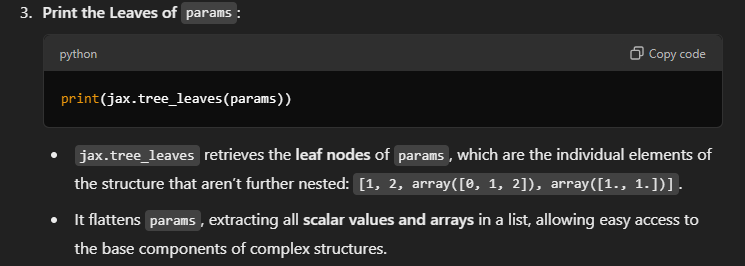

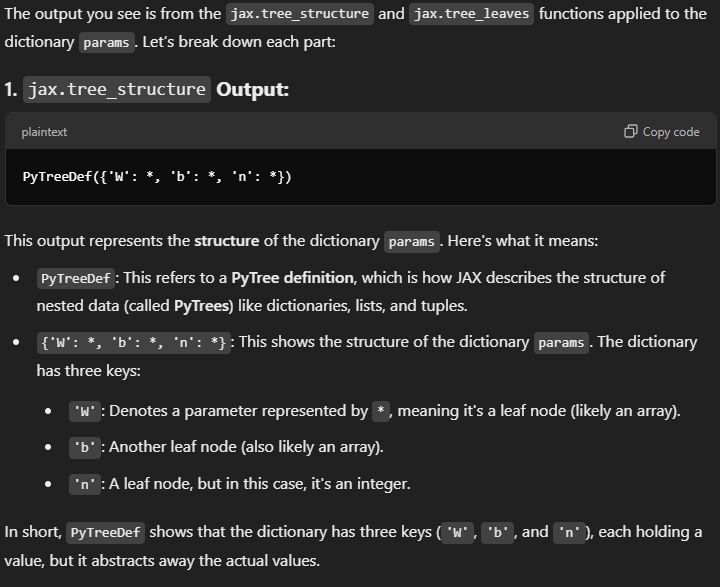

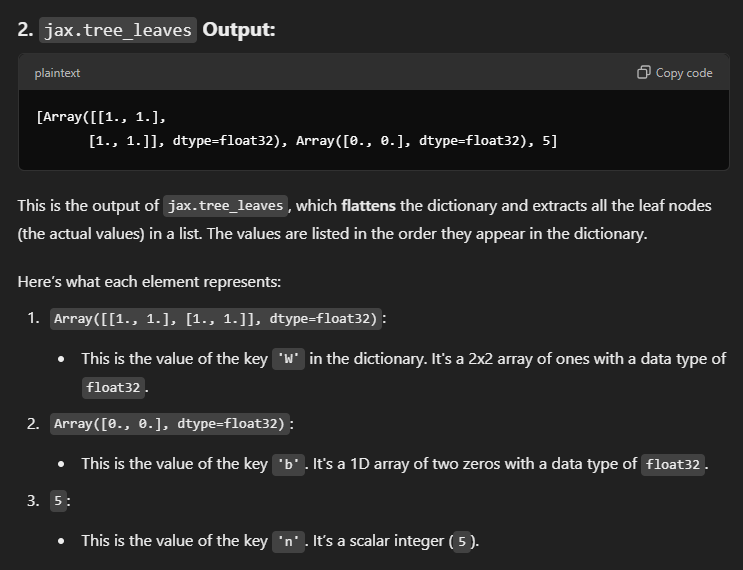

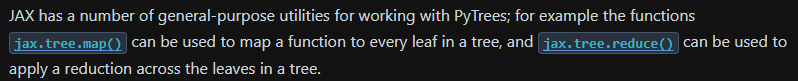